In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('W-ZsWqcl1_c')

# 如何使用和开发微信聊天机器人的系列教程
# A workshop to develop & use an intelligent and interactive chat-bot in WeChat

### WeChat is a popular social media app, which has more than 800 million monthly active users.

<img src='http://www.kudosdata.com/wp-content/uploads/2016/11/cropped-KudosLogo1.png' width=30% style="float: right;">
<img src='reference/WeChat_SamGu_QR.png' width=10% style="float: right;">

### http://www.KudosData.com

by: Sam.Gu@KudosData.com


April 2017 ========== Scan the QR code to become trainer's friend in WeChat ========>>

### 第一课：使用微信问答机制
### Lesson 1: Basic usage of WeChat Python API
* 使用和开发微信个人号聊天机器人：一种Python编程接口 (Use WeChat Python API)
* 用微信App扫QR码图片来自动登录 (Log-in, contact scan, and processing of text, image, file, video, etc)
* 查找指定联系人或群组 (Scan ccontact list)
* 发送信息（文字、图片、文件、音频、视频等） (Send message: text, image, file, voice, video, etc)
* 接收信息 (Receive message, and keep 'listening')
* 自动回复 (Receive message and then automaticaly reply)
* 自定义复杂消息处理，例如：信息存档、回复群组中被@的消息 (Advanced message processing and reply)

### 导入需要用到的一些功能程序库：

In [1]:
# from __future__ import unicode_literals, division
import time, datetime, requests, itchat
from itchat.content import *

### * 用微信App扫QR码图片来自动登录

In [2]:
itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。
# itchat.auto_login(enableCmdQR=-2) # enableCmdQR=-2: 命令行显示QR图片

Getting uuid of QR code.
Please scan the QR code to log in.


www.KudosData.com : QR.png


Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 白黑


In [140]:
itchat.logout

<bound method logout of <itchat.core.Core object at 0x7f111fc929e8>>

LOG OUT!


In [3]:
friends = itchat.get_friends(update=True)[0:]

In [4]:
len(friends)

461

In [19]:
# from pandas import DataFrame
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#初始化计数器
male = female = other = 0
#friends[0]是自己的信息，所以要从friends[1]开始
for i in friends[ 1:]:
    sex = i[ "Sex"]
    if sex == 1:
        male += 1
    elif sex == 2:
        female += 1
    else:
        other += 1
#计算朋友总数
total = len(friends[ 1:])
#打印出自己的好友性别比例
print( "男性好友： %.2f%%" % ( float(male)/total* 100) + "\n" +
"女性好友： %.2f%%" % (float(female) / total * 100) + "\n" +
"不明性别好友： %.2f%%" % (float(other) / total * 100))

男性好友： 48.48%
女性好友： 41.96%
不明性别好友： 9.57%


In [135]:
#定义一个函数，用来爬取各个变量
def get_var(var):
    variable = []
    for i in friends:
        value = i[var]
        variable.append(value)
    return variable
#调用函数得到各变量，并把数据存到csv文件中，保存到桌面
NickName = get_var("NickName")
Sex = get_var('Sex')
Province = get_var('Province')
City = get_var('City')
Signature = get_var('Signature')
data = {'NickName': NickName, 'Sex': Sex, 'Province': Province,
        'City': City, 'Signature': Signature}
frame = pd.DataFrame(data)
frame.to_csv('data.csv', index=True)

In [136]:
frame

,City,NickName,Province,Sex,Signature
0,,白黑,Auckland,1,
1,,小新,,1,Bucket
2,,Sherlyn,,0,
3,长宁,Joling,上海,2,
4,杨浦,Risa,上海,2,慢慢来 才会快
5,徐汇,herry,上海,1,乔奇豪
6,,唐益儒,上海,1,形成于思毁于随
7,闵行,小清新,上海,1,别开枪，是朕
8,杨浦,恶魔,上海,2,干掉上帝、我就是神…！
9,浦东新区,小牛他爸爸,上海,1,


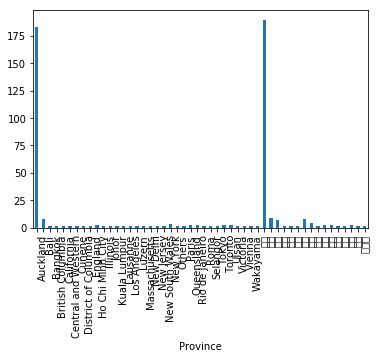

In [24]:
frame.groupby(['Province']).size().plot(kind='bar')

/home/user/env_py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


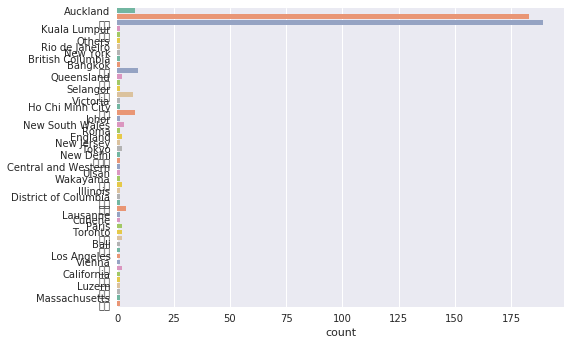

In [137]:
import seaborn as sns; sns.set()
plt.figure(1)
# sns.countplot(x=col, hue="WnvPresent", data=frame, palette="Set2")
sns.countplot(y=Province, data=frame, palette="Set2")

In [139]:
frame['Province'].value_counts()

上海                      189
                        183
北京                        9
Auckland                  8
广东                        8
四川                        7
江苏                        4
New South Wales           3
Paris                     2
辽宁                        2
浙江                        2
England                   2
Toronto                   2
湖北                        2
Tokyo                     2
Queensland                2
Ho Chi Minh City          1
Wakayama                  1
Lausanne                  1
香港                        1
Others                    1
Roma                      1
Rio de Janeiro            1
Victoria                  1
Central and Western       1
山西                        1
天津                        1
British Columbia          1
New Delhi                 1
福建                        1
Massachusetts             1
Kuala Lumpur              1
New Jersey                1
河南                        1
Johor                     1
山东                  

In [80]:
import re
siglist = []
for i in friends:
    signature = i["Signature"].strip().replace("span","").replace("class","").replace("emoji","")
    rep = re.compile("1fd+w*|[<>/=]")
    signature = rep.sub("", signature)
    siglist.append(signature)
text = "".join(siglist)

In [81]:
import jieba
wordlist = jieba.cut(text, cut_all=True)
word_space_split = " ".join(wordlist)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 4.255 seconds.
Prefix dict has been built succesfully.


In [89]:
# wordlist
word_space_split

'Bucket 慢慢 慢慢来 慢来   才 会 快 乔 奇 豪 形成 于思 毁于 随 别 开枪   是 朕 干掉 上帝   我 就是 神    杨 之 成 英雄 不问 问出 出处   流氓 不问 岁数   别 开枪   是 朕   海阔天高 swimming anyone  i teach swimming professionally in sg   郑 春 宝 once a blue forever blueLove if too much is possessive Need To FocusDorisThe mighty fall  人生 生就 就是 要 平平 平平淡淡 平淡 淡淡 淡淡的 啊 天天 天天向上 向上 仰望 交托 What a wonderful world Save water  Shower with your girlfriend    1f604  慌 则 乱   急 则 疲   莫 舍己 道   勿扰 他 心 Stay hungry Stay foolish 放下 与 给予   即是 拥有   O  以 平常 平常心 破 执着 心 加油 吧   兄弟 们   挣扎 的 熊猫 云 光 凝 碧 远 岚 平 如果 这个 时候 窗外 有 风   我 就 有 了 飞 的 理由     未来 滚滚 滚滚而来 而来 小桥   流水   人家 Looking for Nice chat  Good friends 人生 識 字 糊 塗 始   就是 喜欢 你 看不惯 不惯 我 却 不得 不得不 和 我 一同 建设 中国 国特 特色 社会 社会主义 会主 主义 的 样子 BROTM 让 我们 随风 随风飘 随风飘扬 飘扬   尽情 飞舞 吧            梦 一样 自由    mint condition 所有 有事 事情 的 结局 都 是 好 的   如果 不好 说明 还 没到 最后 自娱 自娱自乐 自乐  Being sure is hot 开心 快乐 就 好   忘掉 那些 不开 开心 的 Instagram    meienmaryann 柢 固 则 生长   根 深 则 视 久   你 负责 挣钱 养家   我 负责 貌美 貌美如花   不 喜欢 打电话 电话   不 听 语音   文字 联系  Work hard  play har

/home/user/env_py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


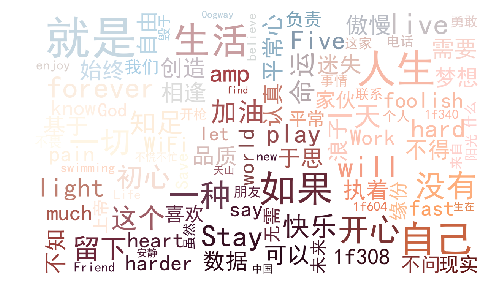

In [134]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import PIL.Image as Image
coloring = np.array(Image.open("image/42.jpg"))
my_wordcloud = WordCloud(background_color="white", max_words=100,
                         mask=coloring, max_font_size=60, random_state=42, scale=2,
                         font_path="reference/simhei.ttf").generate(word_space_split)

image_colors = ImageColorGenerator(coloring)
plt.imshow(my_wordcloud.recolor(color_func=image_colors))
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

### * 查找指定联系人或群组

使用search_friends方法可以搜索用户，有几种搜索方式： 


1.仅获取自己的用户信息 


2.获取昵称'NickName'、微信号'Alias'、备注名'RemarkName'中的任何一项等于name键值的用户 


3.获取分别对应相应键值的用户

In [ ]:
# 获取自己的用户信息，返回自己的属性字典
friend = itchat.search_friends()
print(friend)

In [ ]:
print('NickName  : %s' % friend['NickName'])
print('Alias A-ID: %s' % friend['Alias'])
print('RemarkName: %s' % friend['RemarkName'])
print('UserName  : %s' % friend['UserName'])

In [ ]:
# 获取任何一项等于name键值的用户。
# 'NickName' 昵称, set by that friend, changeable
# 'Alias' ID微信号 = wechatAccount, one time set by that friend, cannot change
# 'RemarkName' 备注名, set by current login account owner, changeable by login account owner
# 注意：返回可能包含多个朋友。为什么呢？

friend = itchat.search_friends(name=u'Sam Gu')
# friend = itchat.search_friends(name=u'Mr. R')
# friend = itchat.search_friends(name=u'Ms. S')

In [ ]:
for i in range(0, len(friend)):
    print('NickName  : %s' % friend[i]['NickName'])
    print('Alias A-ID: %s' % friend[i]['Alias'])
    print('RemarkName: %s' % friend[i]['RemarkName'])
    print('UserName  : %s' % friend[i]['UserName'])

In [ ]:
# 获取分别对应相应键值的用户。

# friend = itchat.search_friends(nickName=u'Sam Gu')
# friend = itchat.search_friends(wechatAccount=u'Sam Gu')
friend = itchat.search_friends(remarkName=u'Sam Gu')
# friend = itchat.search_friends(userName=u'Sam Gu')

In [ ]:
for i in range(0, len(friend)):
    print('NickName  : %s' % friend[i]['NickName'])
    print('Alias A-ID: %s' % friend[i]['Alias'])
    print('RemarkName: %s' % friend[i]['RemarkName'])
    print('UserName  : %s' % friend[i]['UserName'])

In [ ]:
# 查找群组
# group = itchat.search_chatrooms(name=u'Data Science')
group = itchat.search_chatrooms(name=u'陪聊妹UAT')

In [ ]:
for i in range(0, len(group)):
    print('NickName  : %s' % group[i]['NickName'])
    print('Alias A-ID: %s' % group[i]['Alias'])
    print('RemarkName: %s' % group[i]['RemarkName'])
    print('UserName  : %s' % group[i]['UserName'])
    print('Is Owner? : %s ( 0 for No | 1 for Yes )' % group[0]['IsOwner'])
    print('Is Admin? : %s' % group[i]['IsAdmin'])
    print('')

### * 发送信息（文字、图片、文件、音频、视频等）

In [ ]:
# 文字
reply = itchat.send(u'别来无恙啊！\n发送时间:\n{:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now()), friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

In [ ]:
# 图片
reply = itchat.send_image('./reference/WeChat_SamGu_QR.png', friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

In [ ]:
# 文件
reply = itchat.send_file('./reference/logo.pdf', friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

In [ ]:
# 音频（语音可以先转成MP3）
reply = itchat.send_file('./reference/audio.mp3', friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

In [ ]:
# 视频
reply = itchat.send_video('./reference/video.mp4', friend[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

In [ ]:
# 发送信息去群组： group[0]['UserName']
# 文字
reply = itchat.send(u'别来无恙啊！\n发送时间:\n{:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now()), group[0]['UserName']) 
print(reply['BaseResponse']['ErrMsg'])

### * 接收信息

显示发给自己的文本消息：

In [ ]:
# itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。

In [ ]:
@itchat.msg_register(itchat.content.TEXT)
def text_reply(msg):
    print(msg['Text'])

In [ ]:
# 长期有效地运行（术语叫做：开始监听）
itchat.run()

回复发给自己的文本消息：

In [ ]:
# interupt, then re-login
itchat.auto_login(hotReload=True)

In [ ]:
@itchat.msg_register(itchat.content.TEXT)
def text_reply(msg):
    print(msg['Text'])
    return u'谢谢亲[嘴唇]我收到 I received:\n' + msg['Text']

In [ ]:
itchat.run()

### * 自定义复杂消息处理，例如：信息存档、回复群组中被@的消息

In [ ]:
# interupt, then re-login
itchat.auto_login(hotReload=True)

In [ ]:
# 如果收到[TEXT, MAP, CARD, NOTE, SHARING]类的信息，会自动回复：
@itchat.msg_register([TEXT, MAP, CARD, NOTE, SHARING]) # 文字、位置、名片、通知、分享
def text_reply(msg):
    itchat.send('%s: %s' % (msg['Type'], msg['Text']), msg['FromUserName'])

# 如果收到[PICTURE, RECORDING, ATTACHMENT, VIDEO]类的信息，会自动保存：
@itchat.msg_register([PICTURE, RECORDING, ATTACHMENT, VIDEO]) # 图片、语音、文件、视频
def download_files(msg):
    msg['Text'](msg['FileName'])
    return '@%s@%s' % ({'Picture': 'img', 'Video': 'vid'}.get(msg['Type'], 'fil'), msg['FileName'])

# 如果收到新朋友的请求，会自动通过验证添加加好友，并主动打个招呼：幸会幸会！Nice to meet you!
@itchat.msg_register(FRIENDS)
def add_friend(msg):
    itchat.add_friend(**msg['Text']) # 该操作会自动将新好友的消息录入，不需要重载通讯录
    itchat.send_msg(u'幸会幸会！Nice to meet you!', msg['RecommendInfo']['UserName'])

# 在群里，如果收到@自己的文字信息，会自动回复：
@itchat.msg_register(TEXT, isGroupChat=True)
def text_reply(msg):
    if msg['isAt']:
        itchat.send(u'@%s\u2005I received: %s' % (msg['ActualNickName'], msg['Content']), msg['FromUserName'])


In [ ]:
itchat.run()

In [ ]:
# interupt, then logout
itchat.logout() # 安全退出

### 恭喜您！已经能够使用微信问答机制了。
* 使用和开发微信个人号聊天机器人：一种Python编程接口 (Use WeChat Python API)
* 用微信App扫QR码图片来自动登录 (Log-in, contact scan, and processing of text, image, file, video, etc)
* 查找指定联系人或群组 (Scan ccontact list)
* 发送信息（文字、图片、文件、音频、视频等） (Send message: text, image, file, voice, video, etc)
* 接收信息 (Receive message, and keep 'listening')
* 自动回复 (Receive message and then automaticaly reply)
* 自定义复杂消息处理，例如：信息存档、回复群组中被@的消息 (Advanced message processing and reply)

### 下一课是第二课：图像识别和处理
### Lesson 2: Image Recognition & Processing
* 识别图片消息中的物体名字 (Recognize objects in image)
* 识别图片消息中的文字 (OCR: Extract text from image)
* 识别人脸 (Recognize human face)
* 基于人脸的表情来识别喜怒哀乐等情绪 (Identify semtiment and emotion from human face)

<img src='http://www.kudosdata.com/wp-content/uploads/2016/11/cropped-KudosLogo1.png' width=30% style="float: right;">
<img src='reference/WeChat_SamGu_QR.png' width=10% style="float: left;">

